실제 데이터= [ 99  86  87  88 111  86 103  87  94  78  77  85  86]
수치해 데이터= [94.34952171 90.84694628 89.09565857 90.84694628 99.60338484 73.33406917
 99.60338484 87.34437086 96.10080942 83.84179544 82.09050773 87.34437086
 92.598234  ]
해석해 데이터= [94.46218516 90.91165827 89.13639483 90.91165827 99.78797548 73.15902386
 99.78797548 87.36113139 96.2374486  83.81060451 82.03534107 87.36113139
 92.68692171]
수치해 오차= [ 4.65047829  4.84694628  2.09565857  2.84694628 11.39661516 12.66593083
  3.39661516  0.34437086  2.10080942  5.84179544  5.09050773  2.34437086
  6.598234  ]
해석해 오차= [ 4.53781484  4.91165827  2.13639483  2.91165827 11.21202452 12.84097614
  3.21202452  0.36113139  2.2374486   5.81060451  5.03534107  2.36113139
  6.68692171]
수치해_err_A_min= 0.34437086092715674
수치해_err_A_max= 12.66593083149371
해석해_err_B_min= 0.36113139080488565
해석해_err_B_max= 12.840976139539393
해석해_max - 수치해_max= 0.1750453080456822


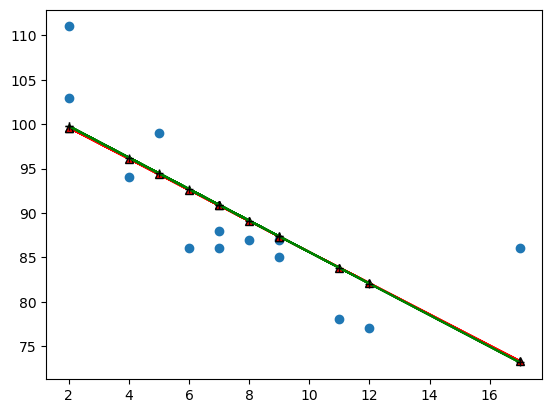

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
x = np.array(x)
y = np.array(y)

#Quiz
#x,y 데이타 분포를 이용하여 대표 직선을 구하고
#데이타 중 최소, 최대 거리(error) 값을 출력하시오.

def mse_line(x,t,w):
    y = w[0]*x+w[1]
    mse = np.mean((y-t)**2)
    return mse

def dmse_line(x,t,w):
    y = w[0]*x+w[1]
    d_w0 = 2*np.mean((y-t)*x)
    d_w1 = 2*np.mean(y-t)
    return d_w0, d_w1

def fit_line_num(x,t):
    w_init=[10.0,165.0]
    alpha = 0.001 #lre
    i_max = 100000
    eps = 0.1 #반복을 종료 기울기의 절대값의 한계
    w_i = np.zeros([i_max,2])
    w_i[0,:] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x,t,w_i[i-1])
        w_i[i,0] = w_i[i-1,0] - alpha*dmse[0]
        w_i[i,1] = w_i[i-1,1] - alpha*dmse[1]
        if(max(np.absolute(dmse))<eps):
            break
    w0 = w_i[i,0]
    w1 = w_i[i,1]
    w_i = w_i[:i,:]
    return w0, w1, dmse, w_i

def fit_line(x,t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t*x)
    mxx = np.mean(x*x)
    w0 = (mtx-mt*mx)/(mxx-mx**2)
    w1 = mt-w0*mx
    return np.array([w0,w1])

w_A = fit_line(x,y)
a = w_A[0]
b = w_A[1]
y_A = a*x+b
err_A = np.abs(y-y_A)
err_A_max = np.max(err_A)
err_A_min = np.min(err_A)

w_B = fit_line_num(x,y)
a = w_B[0]
b = w_B[1]
y_B = a*x+b
err_B = np.abs(y-y_B)
err_B_max = np.max(err_B)
err_B_min = np.min(err_B)
print('실제 데이터=',y)
print('수치해 데이터=',y_A)
print('해석해 데이터=',y_B)
print('수치해 오차=',err_A)
print('해석해 오차=',err_B)
print('수치해_err_A_min=',err_A_min)
print('수치해_err_A_max=',err_A_max)
print('해석해_err_B_min=',err_B_min)
print('해석해_err_B_max=',err_B_max)
print('해석해_max - 수치해_max=',err_B_max-err_A_max)

plt.scatter(x, y)
plt.plot(x, y_A,marker='^', linestyle='-',color='red',markeredgecolor='black')
plt.plot(x, y_B,marker='+', linestyle='-',color='green',markeredgecolor='black')
#plt.show()

plt.savefig('해석해vs수치해.png')

In [5]:
82*0.98/1.78/1.78

25.362959222320413